# Tema 13: Deep learning

__Ejercicio: reconocimiento de lenguaje de signos__

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("itskumar/asl-mnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-mnist


In [2]:
import pandas as pd
train_df = pd.read_csv("/kaggle/input/asl-mnist/sign_mnist_train.csv")
valid_df = pd.read_csv("/kaggle/input/asl-mnist/sign_mnist_valid.csv")
print(train_df.head(n=2))

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']
x_train = train_df.values
x_valid = valid_df.values

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  

[2 rows x 785 columns]


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(27455, 784)
(27455,)
(7172, 784)
(7172,)


<Figure size 640x480 with 0 Axes>

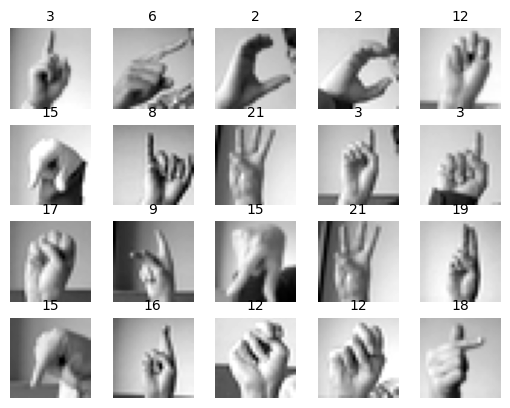

In [4]:
import matplotlib.pyplot as plt
plt.figure()
nfils=4
ncols=5
fig, axes = plt.subplots(nfils, ncols)
for fil in range(nfils):
    for col in range(ncols):
        i = fil*ncols + col
        sign = x_train[i]
        label = y_train[i]
        image = sign.reshape(28,28)
        axes[fil,col].imshow(image, cmap='gray')
        axes[fil,col].set_title(label, fontdict={'fontsize': 10})
        axes[fil,col].axis('off')


In [5]:
print(x_train.min())
print(x_train.max())
print(x_valid.min())
print(x_valid.max())

0
255
0
255


In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras
import os

num_classes = 25

# Normalizar x_train y x_valid
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# Categorizar y_train y y_valid
y_train_cat = to_categorical(y_train, num_classes)
y_valid_cat = to_categorical(y_valid, num_classes)

# Modelo
model = Sequential() # modelo secuencial
model.add(Dense(512, activation='relu', input_shape=(784,))) # 784 --> 512, ReLU
model.add(Dense(512, activation='relu')) # 512, ReLU
model.add(Dense(num_classes, activation='softmax')) # Capa densa softmax

model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el  modelo
history = model.fit(x_train, y_train_cat, validation_data=(x_valid, y_valid_cat), epochs=20, batch_size=128)

2025-05-19 11:16:32.085474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747653392.285595      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747653392.344367      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747653404.856017      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │          12,825 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677,401 (2.58 MB)

 Trainable params: 677,401 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1747653407.358192     107 service.cc:148] XLA service 0x78d03800adf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747653407.358759     107 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747653407.358779     107 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747653407.527403     107 cuda_dnn.cc:529] Loaded cuDNN version 90300


 72/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0863 - loss: 3.2755

I0000 00:00:1747653408.392743     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1543 - loss: 2.9195 - val_accuracy: 0.3515 - val_loss: 2.0065
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4243 - loss: 1.8145 - val_accuracy: 0.5215 - val_loss: 1.4563
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5636 - loss: 1.3357 - val_accuracy: 0.4501 - val_loss: 1.7996
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6566 - loss: 1.0467 - val_accuracy: 0.5721 - val_loss: 1.3824
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7328 - loss: 0.7892 - val_accuracy: 0.6514 - val_loss: 1.0238
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.6292 - val_accuracy: 0.7029 - val_loss: 0.9575
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8416 - loss: 0.5050 - val_accuracy: 0.5131 - val_loss: 1.9955
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8645 - loss: 0.4433 - val_accuracy: 0.5556 - val